In [1724]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgbm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [1647]:
train_df =  pd.read_csv('train_cab.csv')

In [1648]:
test_df =  pd.read_csv('test.csv')

In [1649]:
train_df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [1650]:
test_df.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [1651]:
train_df.shape

(16067, 7)

In [1652]:
test_df.shape

(9914, 6)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b23f68dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b23f754a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b23f689b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b23f75b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b23f75e80>],
 'means': []}

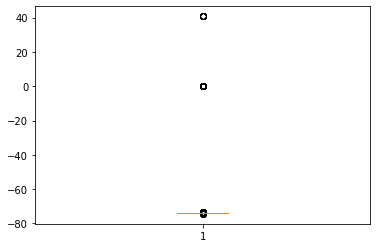

In [1653]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(train_df['pickup_longitude'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b23e4a400>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b23e4aa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b23ebbf98>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b23e4aeb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b23e534a8>],
 'means': []}

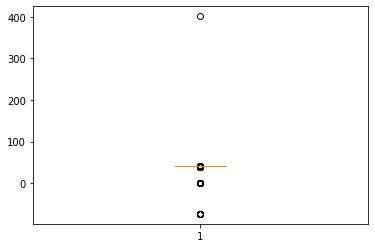

In [1654]:

#Outlier Analysis
%matplotlib inline
plt.boxplot(train_df['pickup_latitude'])


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b23e16dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b23e23780>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b23e16c88>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b23e23e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b23e23ef0>],
 'means': []}

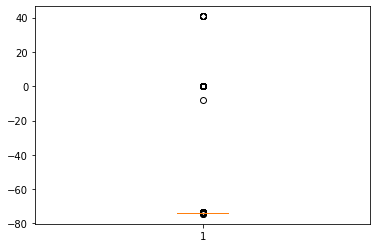

In [1655]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(train_df['dropoff_longitude'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b23dfe668>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b23dfecf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b23dfe240>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b23d863c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b23d86710>],
 'means': []}

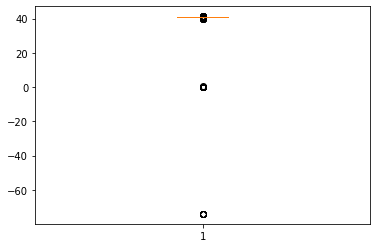

In [1656]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(train_df['dropoff_latitude'])

/home/priyanka/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/priyanka/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/priyanka/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/priyanka/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x7f5b23d55748>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5b23d55b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f5b23d55390>],
 'medians': [<matplotlib.lines.Line2D at 0x7f5b23d621d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f5b23d62518>],
 'means': []}

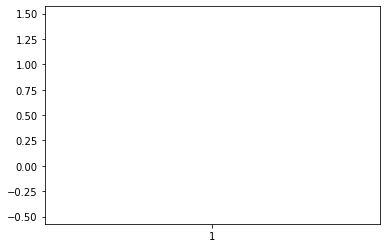

In [1657]:
#Outlier Analysis
%matplotlib inline
plt.boxplot(train_df['passenger_count'])


In [1658]:

train_df["fare_amount"] = pd.to_numeric(train_df["fare_amount"])

In [1659]:
train_df['pickup_latitude'].describe()

count    16067.000000
mean        39.914725
std          6.826587
min        -74.006893
25%         40.734927
50%         40.752603
75%         40.767381
max        401.083332
Name: pickup_latitude, dtype: float64

In [1660]:
train_df['pickup_longitude'].describe()

count    16067.000000
mean       -72.462787
std         10.578384
min        -74.438233
25%        -73.992156
50%        -73.981698
75%        -73.966838
max         40.766125
Name: pickup_longitude, dtype: float64

In [1661]:
#Latitudes range from -90 to 90.
#Longitudes range from -180 to 180.

train_df[train_df['pickup_latitude']< -90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [1662]:
train_df[train_df['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1.0


In [1663]:
#deleting the outlier
train_df = train_df.drop(((train_df[train_df['pickup_latitude']<-90])|(train_df[train_df['pickup_latitude']>90])).index, axis=0)

In [1664]:
train_df.shape

(16066, 7)

In [1665]:
train_df[train_df['pickup_longitude']< -180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [1666]:
train_df[train_df['pickup_longitude']>180]
#no outliers to be deleted

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [1667]:
train_df[train_df['dropoff_latitude']<-90]


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [1668]:
train_df[train_df['dropoff_latitude']>90]
#no outliers to be deleted

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [1669]:
train_df[train_df['dropoff_longitude']< -180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [1670]:
train_df[train_df['dropoff_longitude']>180]
#no outliers to be deleted

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [1671]:
import datetime as dt
def convert_to_datetime(df):
    test_time = df['pickup_datetime'].astype(str).str[:-4]
    df['pickup_date_time'] =  pd.to_datetime(test_time, format='%Y%m%d %H:%M:%S')
    return df 


In [1672]:
# Apply to both train and test data   
train_df = convert_to_datetime(train_df)
test_df = convert_to_datetime(test_df)


In [1673]:
train_df.dtypes

fare_amount                 float64
pickup_datetime              object
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
pickup_date_time     datetime64[ns]
dtype: object

In [1674]:
test_df.dtypes

pickup_datetime              object
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
pickup_date_time     datetime64[ns]
dtype: object

In [1675]:
train_df.shape

(16066, 8)

In [1676]:
train_df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date_time
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0,2009-06-15 17:26:21
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0,2010-01-05 16:52:16
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0,2011-08-18 00:35:00
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0,2012-04-21 04:30:42
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0,2010-03-09 07:51:00


In [1677]:
test_df.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date_time
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2015-01-27 13:08:24
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2015-01-27 13:08:24
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,2011-10-08 11:53:44
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,2012-12-01 21:12:12
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,2012-12-01 21:12:12


In [1678]:
train_df=train_df.drop('pickup_datetime', axis=1)
test_df=test_df.drop('pickup_datetime' , axis=1)

In [1679]:
train_df.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date_time
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009-06-15 17:26:21
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010-01-05 16:52:16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011-08-18 00:35:00
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012-04-21 04:30:42
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010-03-09 07:51:00


In [1680]:
test_df.head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date_time
0,-73.973320,40.763805,-73.981430,40.743835,1,2015-01-27 13:08:24
1,-73.986862,40.719383,-73.998886,40.739201,1,2015-01-27 13:08:24
2,-73.982524,40.751260,-73.979654,40.746139,1,2011-10-08 11:53:44
3,-73.981160,40.767807,-73.990448,40.751635,1,2012-12-01 21:12:12
4,-73.966046,40.789775,-73.988565,40.744427,1,2012-12-01 21:12:12


In [1681]:
coord = ['pickup_longitude','pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count']
for i in coord :
    train_df[i] = train_df[i].replace(0,np.nan)
    

In [1682]:
train_df.shape

(16066, 7)

In [1683]:
print(train_df.isnull().sum())

fare_amount           24
pickup_longitude     315
pickup_latitude      315
dropoff_longitude    314
dropoff_latitude     312
passenger_count      112
pickup_date_time       1
dtype: int64


In [1684]:
test_df.shape

(9914, 6)

In [1685]:
# There are 15637 rows which have not null values and total number of row count is 16067. We just cannot delete around 500 rows. This can impact the model. Hence, we have to impute the missing values.

In [1723]:
# So we have a lot of NaN values for the Haversine
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train_data=pd.DataFrame(imp.fit_transform(train_df), columns=train_df.columns)
print(f'Row count after imputing missing values - {train_data.shape[0]}')

Row count after imputing missing values - 16066


In [1687]:
train_data.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date_time
0,4.5,-73.8443,40.7213,-73.8416,40.7123,1,2009-06-15 17:26:21
1,16.9,-74.016,40.7113,-73.9793,40.782,1,2010-01-05 16:52:16
2,5.7,-73.9827,40.7613,-73.9912,40.7506,2,2011-08-18 00:35:00
3,7.7,-73.9871,40.7331,-73.9916,40.7581,1,2012-04-21 04:30:42
4,5.3,-73.9681,40.768,-73.9567,40.7838,1,2010-03-09 07:51:00


In [1688]:
print(train_data.isnull().sum())

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_date_time     0
dtype: int64


In [1689]:
# The latitude of New York City, USA is 40.730610, and the longitude is -73.935242 which is mostly prevalent in our dataset. Therefore we can conclude that this cab service runs in New York City, USA.

In [1690]:
# So I have set up a longitude range for the ride
train_data = train_data.loc[train_data.pickup_longitude < -71]
train_data = train_data.loc[train_data.pickup_longitude > -74.5]

# And a latitude range for the ride
train_data = train_data.loc[train_data.pickup_latitude < 42]
train_data = train_data.loc[train_data.pickup_latitude > 40]

In [1691]:
train_data.shape

(16052, 7)

In [1692]:
train_data = train_data.loc[train_data.dropoff_longitude < -71]
train_data = train_data.loc[train_data.dropoff_longitude > -74.5]

train_data = train_data.loc[train_data.dropoff_latitude < 42]
train_data = train_data.loc[train_data.dropoff_latitude > 40]

In [1693]:
train_data.shape

(16048, 7)

In [1694]:
train_data['longitude_diff'] = train_data['dropoff_longitude'] - train_data['pickup_longitude']

train_data['latitude_diff'] = train_data['dropoff_latitude'] - train_data['pickup_latitude']


In [1695]:
train_data = train_data.loc[train_data.passenger_count > 0]
train_data = train_data.loc[train_data.passenger_count <= 9 ]
train_data.shape

(16028, 9)

In [1696]:
train_data.head(5)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date_time,longitude_diff,latitude_diff
0,4.5,-73.8443,40.7213,-73.8416,40.7123,1,2009-06-15 17:26:21,0.002701,-0.009041
1,16.9,-74.016,40.7113,-73.9793,40.782,1,2010-01-05 16:52:16,0.03678,0.070701
2,5.7,-73.9827,40.7613,-73.9912,40.7506,2,2011-08-18 00:35:00,-0.008504,-0.010708
3,7.7,-73.9871,40.7331,-73.9916,40.7581,1,2012-04-21 04:30:42,-0.004437,0.024949
4,5.3,-73.9681,40.768,-73.9567,40.7838,1,2010-03-09 07:51:00,0.01144,0.015754


In [1697]:
train_data.dtypes

fare_amount          object
pickup_longitude     object
pickup_latitude      object
dropoff_longitude    object
dropoff_latitude     object
passenger_count      object
pickup_date_time     object
longitude_diff       object
latitude_diff        object
dtype: object

In [1698]:
train_data["fare_amount"] = pd.to_numeric(train_data["fare_amount"])
train_data["pickup_latitude"] = pd.to_numeric(train_data["pickup_latitude"])
train_data["pickup_longitude"] = pd.to_numeric(train_data["pickup_longitude"])
train_data["dropoff_latitude"] = pd.to_numeric(train_data["dropoff_latitude"])
train_data["dropoff_longitude"] = pd.to_numeric(train_data["dropoff_longitude"])
train_data["pickup_date_time"] = pd.to_datetime(train_data["pickup_date_time"])
train_data["longitude_diff"] = pd.to_numeric(train_data["longitude_diff"])
train_data["latitude_diff"] = pd.to_numeric(train_data["latitude_diff"])
train_data["passenger_count"] = pd.to_numeric(train_data["passenger_count"])

In [1699]:
train_data.dtypes

fare_amount                 float64
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
pickup_date_time     datetime64[ns]
longitude_diff              float64
latitude_diff               float64
dtype: object

In [1700]:
test_df['longitude_diff'] = test_df['dropoff_longitude'] - test_df['pickup_longitude']
test_df['latitude_diff'] = test_df['dropoff_latitude'] - test_df['pickup_latitude']


In [1701]:
train_data = train_data.loc[(train_data['fare_amount'] > 0) & (train_data['fare_amount'] < 60)]
train_data.shape

(15987, 9)

In [1702]:
train_data.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date_time,longitude_diff,latitude_diff
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009-06-15 17:26:21,0.002701,-0.009041
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010-01-05 16:52:16,0.036780,0.070701
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011-08-18 00:35:00,-0.008504,-0.010708
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012-04-21 04:30:42,-0.004437,0.024949
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010-03-09 07:51:00,0.011440,0.015754


In [1703]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train_data, test_df]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [1704]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323259
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081664
9898     0.555287
9899     5.610505
9900     1.890608
9901     1.530118
9902     3.891526
9903     2.299316
9904    15.091262
9905     9.613798
9906     0.369506
9907     9.923998
9908     1

In [1705]:
train_data['H_Distance'].head(10)

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
5    3.787239
6    1.555807
7    4.155444
8    1.253232
9    2.849627
Name: H_Distance, dtype: float64

In [1706]:
test_df['H_Distance'].head(10)

0     2.323259
1     2.425353
2     0.618628
3     1.961033
4     5.387301
5     3.222549
6     0.929601
7    21.540102
8     3.873962
9     1.099794
Name: H_Distance, dtype: float64

In [1707]:
x_traindf = train_data.drop('pickup_date_time', axis=1)

In [1708]:
x_traindf.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_diff,latitude_diff,H_Distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,0.002701,-0.009041,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,0.036780,0.070701,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,-0.008504,-0.010708,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,-0.004437,0.024949,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,0.011440,0.015754,1.999157


In [1709]:
train_data.shape

(15987, 10)

In [1710]:
x_train = x_traindf.drop('fare_amount', axis=1)

In [1711]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_diff,latitude_diff,H_Distance
0,-73.844311,40.721319,-73.841610,40.712278,1.0,0.002701,-0.009041,1.030764
1,-74.016048,40.711303,-73.979268,40.782004,1.0,0.036780,0.070701,8.450134
2,-73.982738,40.761270,-73.991242,40.750562,2.0,-0.008504,-0.010708,1.389525
3,-73.987130,40.733143,-73.991567,40.758092,1.0,-0.004437,0.024949,2.799270
4,-73.968095,40.768008,-73.956655,40.783762,1.0,0.011440,0.015754,1.999157


In [1712]:
y_train = train_data['fare_amount']

In [1713]:
x_test = test_df.drop('pickup_date_time', axis=1)

In [1714]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,longitude_diff,latitude_diff,H_Distance
0,-73.973320,40.763805,-73.981430,40.743835,1,-0.008110,-0.019970,2.323259
1,-73.986862,40.719383,-73.998886,40.739201,1,-0.012024,0.019817,2.425353
2,-73.982524,40.751260,-73.979654,40.746139,1,0.002870,-0.005121,0.618628
3,-73.981160,40.767807,-73.990448,40.751635,1,-0.009288,-0.016172,1.961033
4,-73.966046,40.789775,-73.988565,40.744427,1,-0.022519,-0.045348,5.387301


In [1715]:
# Set up the models.
# Linear Regression Model

regr = LinearRegression()
regr.fit(x_train, y_train)
regr_pred = regr.predict(x_test)
submission_rlg = pd.DataFrame({
        "PickupDateTime": test_df["pickup_date_time"],
        "FareAmount": regr_pred.round(2)
    })
submission_rlg.to_csv('submission_rlg.csv', index=False)


In [1716]:
# Random Forest Regressor

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)
submission_rfr = pd.DataFrame({
        "PickupDateTime": test_df["pickup_date_time"],
        "FareAmount": rfr_pred.round
    })
submission_rfr.to_csv('submission_rlg.csv', index=False)


/home/priyanka/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [1717]:
x_pred = test_df.drop('pickup_date_time', axis=1)


In [1718]:
# Let's run XGBoost and predict those fares!
x_train,x_test,y_train,y_test = train_test_split(x_traindf.drop('fare_amount',axis=1),x_traindf.pop('fare_amount'),random_state=123,test_size=0.2)

def XGBmodel(x_train,x_test,y_train,y_test):
    matrix_train = xgb.DMatrix(x_train,label=y_train)
    matrix_test = xgb.DMatrix(x_test,label=y_test)
    model=xgb.train(params={'objective':'reg:linear','eval_metric':'rmse'}
                    ,dtrain=matrix_train,num_boost_round=200, 
                    early_stopping_rounds=20,evals=[(matrix_test,'test')],)
    return model

model=XGBmodel(x_train,x_test,y_train,y_test)
xgb_pred = model.predict(xgb.DMatrix(x_pred), ntree_limit = model.best_ntree_limit)

[19:01:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	test-rmse:10.0324
Will train until test-rmse hasn't improved in 20 rounds.
[1]	test-rmse:7.57422
[2]	test-rmse:6.01646
[3]	test-rmse:5.07141
[4]	test-rmse:4.54148
[5]	test-rmse:4.24371
[6]	test-rmse:4.09199
[7]	test-rmse:4.03429
[8]	test-rmse:4.00746


/home/priyanka/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[9]	test-rmse:3.98582
[10]	test-rmse:3.99111
[11]	test-rmse:3.99166
[12]	test-rmse:3.99811
[13]	test-rmse:4.00843
[14]	test-rmse:4.0119
[15]	test-rmse:4.01635
[16]	test-rmse:4.01928
[17]	test-rmse:4.02994
[18]	test-rmse:4.02245
[19]	test-rmse:4.01807
[20]	test-rmse:4.02309
[21]	test-rmse:4.05341
[22]	test-rmse:4.0599
[23]	test-rmse:4.06333
[24]	test-rmse:4.06965
[25]	test-rmse:4.06626
[26]	test-rmse:4.06858
[27]	test-rmse:4.07354
[28]	test-rmse:4.07711
[29]	test-rmse:4.07826
Stopping. Best iteration:
[9]	test-rmse:3.98582



In [1719]:
regr_pred, rfr_pred, xgb_pred

(array([ 9.44910909, 11.41609667,  8.54967   , ..., 34.77959171,
        15.60849613,  7.86886131]),
 array([ 8.79 , 10.07 ,  4.99 , ..., 47.486, 17.3  ,  6.51 ]),
 array([ 8.135204 ,  8.455567 ,  4.938401 , ..., 50.62392  , 20.41386  ,
         6.0056047], dtype=float32))

In [1720]:
# Assigning weights. More precise models gets higher weight.
regr_weight = 1
rfr_weight = 1
xgb_weight = 3
prediction = (regr_pred * regr_weight + rfr_pred * rfr_weight + xgb_pred * xgb_weight) / (regr_weight + rfr_weight + xgb_weight)

In [1721]:
prediction

array([ 8.52894441,  9.37055994,  5.67097473, ..., 46.82747137,
       18.83001542,  6.4791353 ])

In [1722]:
# Add to submission
submission = pd.DataFrame({
        "pickup_DT": test_df['pickup_date_time'],
        "fare_amount": prediction.round(2)
})

submission.to_csv('sub_fare.csv',index=False)